# Thresholding Group Analyses

*Written by Luke Chang*


- Type I error
    - $H_0$ is true, but we mistakenly reject it (i.e., False Positive)
    - This is controlled by significance level $\alpha$.
- Type II error
    - $H_0$ is false, but we fail to reject it (False Negative)
- The probability that a hypothesis test will correctly rejct a false null hypothesis is the *power* of the test.

Hypothesis testing in fMRI is complicated by the fact that we are running many tests across each voxel in the brain (hundreds of thousands of tests). Selecting an appropriate threshold is a balance between sensitivity (i.e., true positive rate) and specificity (i.e., false negative rate). Familywise error rate (FWER) Probability of any false positives. False Discovery Rate (FDR) proportion of false positives among rejected tests.

For a more in depth overview, I encourage you to watch these videos on Multiple Test Correction by Martin Lindquist & Tor Wager.
 - [Multiple Comparisons](https://www.youtube.com/watch?v=AalIM9-5-Pk)
 - [FWER](https://www.youtube.com/watch?v=MxQeEdVNihg)
 - [FDR](https://www.youtube.com/watch?v=W9ogBO4GEzA)
 - [More](https://www.youtube.com/watch?v=N7Iittt8HrU)

- 1 Simulate signal and noise in 2D
- 2 Use FWE methods
    - bonferroni
    - cluster
    - permutation
- 3 Use FDR methods

Show adaptive nature of FDR.


 well-known issue that arrives then is that of multiple comparisons:
when a statistical tests is repeated a large number times, say one for each voxel, i.e. n_voxels times, then one can expect that, in the absence of any effect, the number of detections —false detections since there is no effect— will be roughly n\_voxels \alpha. Then, take \alpha=.001 and n=10^5, the number of false detections will be about 100. The danger is that one may no longer trust the detections, i.e. values of z larger than the (1-\alpha)-quantile of the standard normal distribution.
The first idea that one might think of is to take a much smaller \alpha: for instance, if we take, \alpha=\frac{0.05}{n\_voxels} then the expected number of false discoveries is only about 0.05, meaning that there is a 5% chance to declare active a truly inactive voxel. This correction on the signifiance is known as Bonferroni procedure. It is fairly accurate when the different tests are independent or close to independent, and becomes conservative otherwise. The problem with his approach is that truly activated voxel may not surpass the corresponding threshold, which is typically very high, because n_voxels is large.

A second possibility is to choose a threshold so that the proportion of true discoveries among the discoveries reaches a certain proportion 0<q<1, typically q=0.05. This means that after statistical inference, one can trust the proportionate 1-q of the discoveries made. The number q, is the expected proportion of false discoveries and is known as the false discovery rate. Controling the false dicovery rate is a reasonable compromise in practice. The thresholding yielding this level of control is typically obtained using the so-called Benjamini-Hochberg procedure.

Note Note that q (as well as alpha) are arbitrary. It is recommended not to rely on low values, otherwise the inference is meaningless. Ideally one should use  \alpha=\frac{0.05}{n\_voxels}, or q=0.05.
Note also that supra-threshold sets of voxels are often gathered into connected components (aka clusters), so that only large connected components are retained and isolated supra-threshold are discarded. The rationale is that isolated voxels are unlikely to represent extended brain areas, hence are most likely some noise: discarding them most often improves the quality and the reliability of the results.


We typically summarize the results of neuroimaging studies with a set of statistical maps in which we color-code voxels whose t-values or comparable statistics (e.g. z or F) exceed a specific statistical threshold for significance to describe brain activation. The implication is that the experimental task activated these voxels. Choosing the appropriate threshold is obviously crucial for determining whether or not voxels are ‘active’. Many fields consider the p-value of test statistics taking values below 0.05 as sufficient evidence to reject the null hypothesis with an acceptable false positive rate (α) of 0.05. However, brain imaging often simultaneously performs 100,000 hypothesis tests (one for each voxel). Here a voxel-wise α of 0.05 implies that 5% of the voxels on average will show false positive results - we actually expect around 5,000 false positive results. Thus even if an experiment produces no true activations, there is still a good chance that the subsequent activation map will show a number of activated regions which will lead to erroneous conclusions.
Researchers’ standard method to deal with multiple comparisons is to simultaneously control the probability of obtaining a false positive for every statistical test (i.e. voxel) in the brain by adjusting the threshold. In neuroimaging, researchers have suggested a variety of different approaches for controlling the false positive rate. The fundamental difference between methods is whether they control for the family-wise error rate (FWER), which is the probability of obtaining any false positives in the brain, or for the false discovery rate (FDR), which is the proportion of false positives among all rejected tests.
To briefly illustrate the difference between FWER and FDR correction, assume that when we perform tests on 100,000 brain voxels using α = .001 uncorrected, we find 300 ‘significant’ voxels. Theoretically we would expect 100 (or 33%) of the significant ‘discoveries’ to be false positives, though it would be impossible to tell which. Because of this, we may have low confidence that the activated regions are actually true results, so it could be advantageous to set the threshold to limit the expected false positives to 5%, which is to control the FDR at the q = 0.05 level. We could then argue that most of the results are likely true activations. However, we will still not be able to distinguish truly activated voxels from false positives. FWER provides a stronger method for controlling false positives. If we control the FWER at 5%, the threshold is set in such a way that only 5 out of 100 repeated experiments would result in one or more false positive voxels. Hence when controlling the FWER at 5%, we can be fairly certain that all the voxels we deem active are truly active. That said, the thresholds would typically be quite conservative, which leads to problems with false negatives or with truly active voxels incorrectly deemed inactive. In our example, perhaps only 50 out of the 200 truly active voxels will give rise to significant results. While we can be fairly confident that all 50 are true activations, we have still ‘lost’ 150 active voxels.
It is unfortunate that many published PET and fMRI studies do not use either of these corrections. Instead, they use arbitrary uncorrected thresholds (typically p < .001). One reason the corrected thresholds are so high is because the typically small sample sizes mean power is extremely low.

This is extremely problematic when interpreting individual studies’ conclusions since many of the activated regions are possibly false positives. Sometimes researchers impose an arbitrary ‘extent threshold’ for reporting, which they base on the number of contiguous activated voxels. However, this does not necessarily correct the problem, as imaging data are spatially smooth and corrected thresholds should be reported when possible.
Because achieving sufficient power is not possible, it makes sense to report results at an uncorrected threshold and use meta-analysis, or a comparable replication strategy, to identify consistent results. However, it is important to note that we should not strongly interpret uncorrected results from individual studies. Ideally, studies should report both results which have been corrected and results at a reasonable uncorrected threshold (e.g. p < .001 and 10 contiguous voxels) for archival purposes.

In [177]:
%matplotlib inline

import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltools.stats import regress, zscore
from nltools.data import Brain_Data, Design_Matrix
from nltools.stats import regress 
from nltools.external import glover_hrf
from scipy.stats import ttest_1samp, binom

netid = 'f00275v'
output_dir = '/dartfs/rc/lab/P/Psych60/students_output/%s' % netid
data_dir = '/dartfs/rc/lab/P/Psych60/data/brainomics_data/'

# Hypothesis Testing

In [ ]:
Voxel-wise vs Cluster-wise inference

## Type I vs Type II Error

## Statistical Power

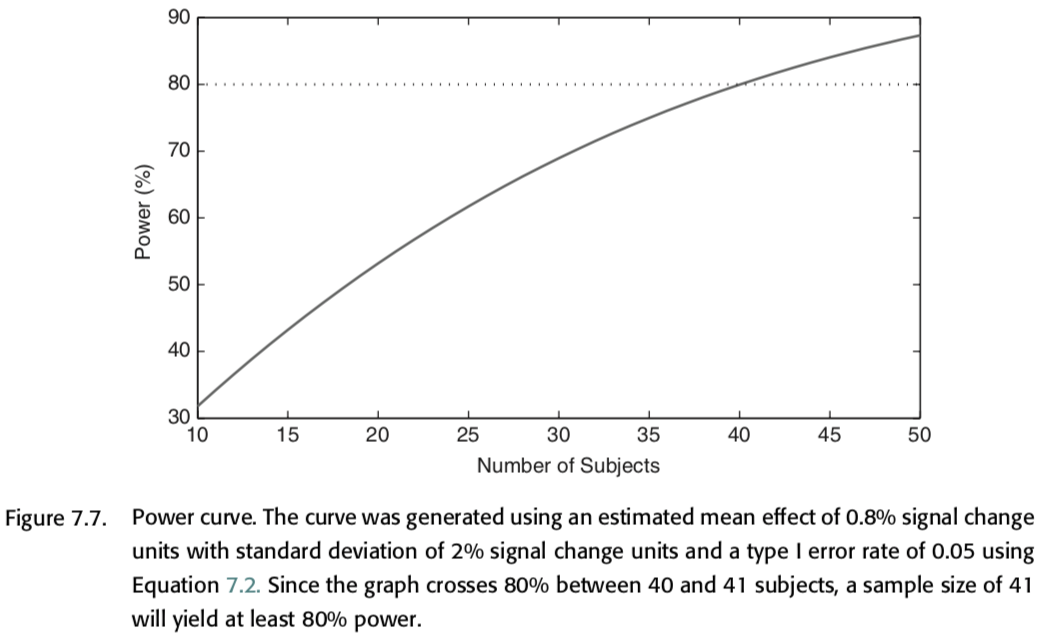

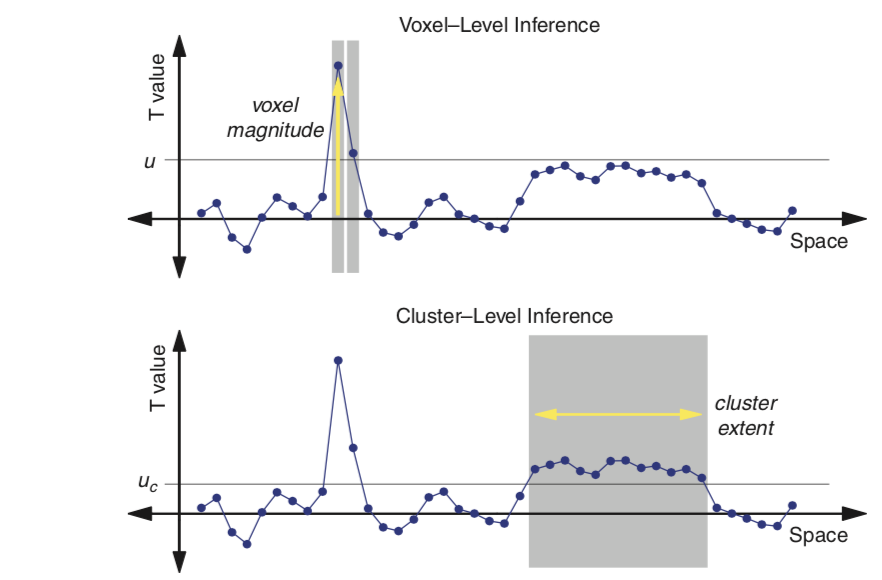

## Reduce the number of comparisons - masking

## Familywise error rate (FWER)

Familywise error rate (FWER) Probability of making one or more Type I errors in a family of tests under the null hypothesis.

any false positives. False Discovery Rate (FDR) proportion of false positives among rejected tests.

The simplest way of controlling the FWER is the classic Bonferroni correction, which divides the applied α value by the total number of statistical tests performed (i.e. voxels). If spatial dependence is present in the data (which is almost always the case because of natural resolution and applied smoothing), this unnecessarily conservative correction leads to decreased power to detect truly active voxels. Gaussian Random Field Theory (RFT) is another, significantly more theoretically complicated, approach toward controlling the FWER. Though RFT is beyond the scope of this book, if the image is smooth and the number of subjects is high enough (around 20), it does provide control closer to the true false positive rate than Bonferroni correction.
RFT can also assess the probability that k contiguous voxels exceed the threshold under the null hypothesis and thus lead to ‘cluster-level’ correction. The probability that researchers will find a cluster of size k under the null hypothesis is specific to an initial uncorrected significance threshold. For example, it is more likely to obtain a cluster of k = 300 at an initial threshold of p < 0.05 than it is with the initial threshold p < 0.001 because more voxels survive the more liberal threshold. A recent analyses by Woo et al.56 has shown that a liberal initial threshold (i.e. higher than p < 0.001) will inflate the number of false positives above the nominal level of 5%. Nichols and Hayasaka57 conclude that while RFT is overly conservative at the voxel level, in small sample sizes it is liberal at the cluster level. Also keep in mind with cluster-level correction that inference is only valid for the whole cluster. It is therefore not possible to make inferences about single voxels within that cluster. Instead, the appropriate interpretation is that ‘there is signal somewhere in the clusterÕ58. For large clusters spanning multiple regions, it is impossible to precisely state which region presents activation. This is particularly problematic with liberal initial thresholds as we consider more voxels active and they form larger clusters. Thus performing cluster-level inference with a liberal initial threshold ultimately reduces the spatial resolution of fMRI.
The RFT approach assumes normal distribution of the error values and equal error variance across all predictors’ values. As an alternative to RFT, nonparametric methods use the data themselves to find
the appropriate distribution. These methods can provide substantial improvements in power and validity, particularly with small sample sizes, so we regard them as the ‘gold standard’ in imaging analyses. Thus these tests can verify the validity of the less computationally expensive parametric approaches.

In [ ]:
## 

### Bonferroni

### Random Field Theory - cluster correction
Gaussian Random Field Theory (RFT) is another, significantly more theoretically complicated, approach toward controlling the FWER. Though RFT is beyond the scope of this book, if the image is smooth and the number of subjects is high enough (around 20), it does provide control closer to the true false positive rate than Bonferroni correction. See this [chapter](https://www.fil.ion.ucl.ac.uk/spm/doc/books/hbf2/pdfs/Ch14.pdf) for an introduction to random field theory and this python [tutorial](https://matthew-brett.github.io/teaching/random_fields.html) by Matthew Brett for a more in depth overview.

### Parametric simulations - alphasim
https://afni.nimh.nih.gov/pub/dist/doc/program_help/AlphaSim.html

### Nonparametric approaches - randomise

https://fsl.fmrib.ox.ac.uk/fsl/fslwiki/Randomise/UserGuide


## Cluster Extent

https://www.pnas.org/content/113/28/7900

## Threshold Free Cluster Extent


## False Discovery Rate
The false discovery rate (FDR) is a comparatively recent development in multiple comparison correction. While FWER is the probability of any false positives occurring in a family of tests, the FDR is the expected proportion of false positives among significant tests. In a brain map, this means that we expect approximately 95% of the voxels reported at q < .05 FDR-corrected (note we use q instead of p) to be true activations. The FDR controlling procedure is adaptive in the sense that the larger the signal, the lower the threshold. Also if all of the null hypotheses are true, then the FDR will be equivalent to the FWER: any procedure which controls the FWER will also control the FDR. For these reasons, any procedure which controls the FDR is necessarily less stringent than a FWER controlling procedure, which leads to increased power. A major advantage, since FDR controlling procedures work only on the p-values and not on the actual test statistics, is that they can be applied to any valid statistical test.

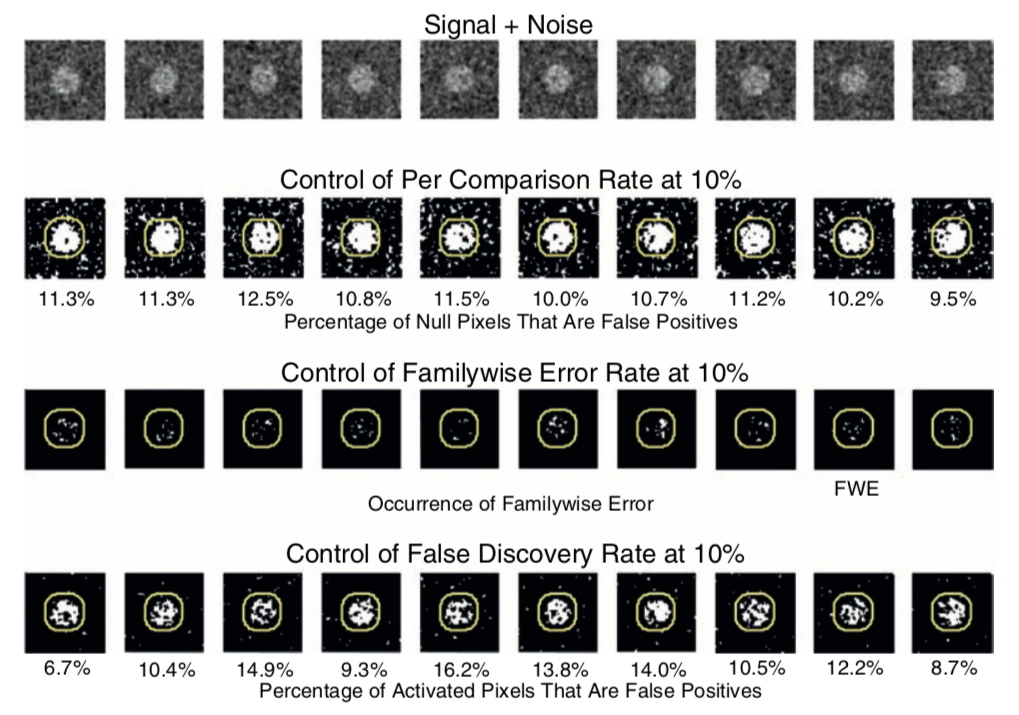

See this [tutorial](https://matthew-brett.github.io/teaching/fdr.html) by Matthew Brett for a more indepth overview of FDR.

In [1]:
%matplotlib inline

import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltools.stats import regress, zscore
from nltools.data import Brain_Data, Design_Matrix
from nltools.stats import regress 
from nltools.external import glover_hrf
from scipy.stats import ttest_1samp

netid = 'f00275v'
# output_dir = '/dartfs/rc/lab/P/Psych60/students_output/%s' % netid
# data_dir = '/dartfs/rc/lab/P/Psych60/data/brainomics_data/'

output_dir = '/Volumes/Psych60/students_output/%s' % netid
data_dir = '/Volumes/Psych60/data/brainomics_data/'

In [2]:
con1_name = 'horizontal_checkerboard'
con1_file_list = glob.glob(os.path.join(data_dir, '*', f'S*_{con1_name}*nii.gz'))
con1_file_list.sort()
con1_dat = Brain_Data(con1_file_list)
con1_stats = con1_dat.ttest()

/Users/lukechang/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/lukechang/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/lukechang/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [9]:
from scipy.ndimage import label, generate_binary_structure

def clusterize_image(image, thresh=None, connectivity=3):
    if thresh is None:
        thresh = 0
    image[np.where(image<=thresh)] = 0
    s = generate_binary_structure(3, connectivity)
    larray, nf = label(image,s)
    return larray

In [11]:
clusterize = clusterize_image(con1_stats['t'].to_nifti().get_data())

/Users/lukechang/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in less_equal
  


In [ ]:
from nilearn.input_data import NiftiMasker
from scipy.ndimage import label
from scipy.stats import norm

def bonferroni_thresh(alpha_fwe, n):
    return alpha_fwe / n

def fdr_threshold(z_vals, alpha):
    """ return the Benjamini-Hochberg FDR threshold for the input z_vals
    
    Parameters
    ----------
    z_vals: array,
            a set of z-variates from which the FDR is computed
    alpha: float,
           desired FDR control
    
    Returns
    -------
    threshold: float,
               FDR-controling threshold from the Benjamini-Hochberg procedure
    """
    if alpha < 0 or alpha > 1:
        raise ValueError('alpha should be between 0 and 1')
    z_vals_ = - np.sort(- z_vals)
    p_vals = norm.sf(z_vals_)
    n_samples = len(p_vals)
    pos = p_vals < alpha * np.linspace(
        .5 / n_samples, 1 - .5 / n_samples, n_samples)
    if pos.any():
        return (z_vals_[pos][-1] - 1.e-12)
    else:
        return np.infty
    
def map_threshold(stat_img=None, mask_img=None, alpha=.001, threshold=3.,
                  height_control='fpr', cluster_threshold=0):
    """ Compute the required threshold level and return the thresholded map
    Parameters
    ----------
    stat_img : Niimg-like object or None, optional
       statistical image (presumably in z scale)
       whenever height_control is 'fpr' or None,
       stat_img=None is acceptable.
       If it is 'fdr' or 'bonferroni', an error is raised if stat_img is None.
    mask_img : Niimg-like object, optional,
        mask image
    alpha: float, optional
        number controling the thresholding (either a p-value or q-value).
        Its actual meaning depends on the height_control parameter.
        This function translates alpha to a z-scale threshold.
    threshold: float, optional
       desired threshold in z-scale.
       This is used only if height_control is None
    height_control: string, or None optional
        false positive control meaning of cluster forming
        threshold: 'fpr'|'fdr'|'bonferroni'\|None
    cluster_threshold : float, optional
        cluster size threshold. In the returned thresholded map,
        sets of connected voxels (`clusters`) with size smaller
        than this number will be removed.
    Returns
    -------
    thresholded_map : Nifti1Image,
        the stat_map thresholded at the prescribed voxel- and cluster-level
    threshold: float,
        the voxel-level threshold used actually
    Note
    ----
    If the input image is not z-scaled (i.e. some z-transformed statistic)
    the computed threshold is not rigorous and likely meaningless
    """
    # Check that height_control is correctly specified
    if height_control not in ['fpr', 'fdr', 'bonferroni', None]:
        raise ValueError(
            "height control should be one of ['fpr', 'fdr', 'bonferroni', None]")

    # if height_control is 'fpr' or None, we don't need to look at the data
    # to compute the threhsold
    if height_control == 'fpr':
        threshold = norm.isf(alpha)

    # In this case, and is stat_img is None, we return
    if stat_img is None:
        if height_control in ['fpr', None]:
            return None, threshold
        else:
            raise ValueError(
                'Map_threshold requires stat_img not to be None'
                'when the heigh_control procedure is bonferroni or fdr')
    
    # Masking
    if mask_img is None:
        masker = NiftiMasker(mask_strategy='background').fit(stat_img)
    else:
        masker = NiftiMasker(mask_img=mask_img).fit()
    stats = np.ravel(masker.transform(stat_img))
    n_voxels = np.size(stats)

    # Thresholding
    if height_control == 'fdr':
        threshold = fdr_threshold(stats, alpha)
    elif height_control == 'bonferroni':
        threshold = norm.isf(alpha / n_voxels)
    stats *= (stats > threshold)

    # embed it back to 3D grid
    stat_map = masker.inverse_transform(stats).get_data()

    # Extract connected components above threshold
    label_map, n_labels = label(stat_map > threshold)
    labels = label_map[masker.mask_img_.get_data() > 0]

    for label_ in range(1, n_labels + 1):
        if np.sum(labels == label_) < cluster_threshold:
            stats[labels == label_] = 0

    return masker.inverse_transform(stats), threshold

In [56]:
import numpy as np
from nltools.mask import create_sphere
from nltools.data import Brain_Data
from nltools.stats import fdr
import matplotlib.pyplot as plt
from nilearn.plotting import plot_glass_brain
import scipy, scipy.stats


def simulate_data(n_samples, amplitude, sigma, coordinates, radius):
    ''' Simulate Brain Data

        Args:
            n_observations: (int) number of data points
            amplitude: (array) signal amplitude
            sigma: (float) amount of gaussian noise to add
            coordinates: (list) x,y,z coordinates of sphere center
            radius: (int) radius of sphere

        Returns:
            data: (list) of Brain_Data objects
    '''

    mask = create_sphere(coordinates, radius=radius)
    dat = Brain_Data(mask)
    dat = dat*amplitude
    dat = Brain_Data([dat for x in range(n_samples)])
    dat.data = dat.data + np.random.randn(*dat.data.shape)*sigma
    return dat

coordinates = [0, 45, 0]
radius = 10
sigma = 1
amplitude = 1
n_samples = 20
dat = simulate_data(n_samples, amplitude, sigma, coordinates, radius)

stats = dat.ttest()
print(fdr(stats['p'].data))

stats_fdr = dat.ttest(threshold_dict={'fdr':.05})
stats_fdr['thr_t'].iplot()

# stats['t'].iplot()

3.18086998015661e-05


interactive(children=(FloatText(value=0.0, description='Threshold'), HTML(value='Image is 3D', description='Vo…

threshold is ignored for simple axial plots
threshold is ignored for simple axial plots


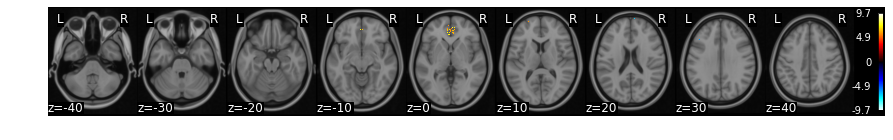

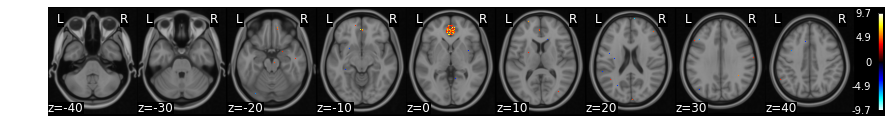

In [57]:
stats_fdr = dat.ttest(threshold_dict={'fdr':.05})
f = stats_fdr['thr_t'].plot()
stats_unc = dat.ttest(threshold_dict={'unc':.001})
f = stats_unc['thr_t'].plot()

In [ ]:
mask = create_sphere(coordinates, radius=radius)
    dat = Brain_Data(mask)
    dat = dat*amplitude
    dat = Brain_Data([dat for x in range(n_samples)])
    dat.data = dat.data + np.random.randn(*dat.data.shape)*sigma
    return dat

coordinates = [0, 45, 0]
radius = 10
sigma = 1
amplitude = 1
n_samples = 20


# dat = simulate_data(n_samples, amplitude, sigma, coordinates, radius)


Let's explore the concept of false positives.

First, let's generate 100 x 100 voxels from $\mathcal{N}(0,1)$ distribution.  

Now let's apply a threshold at u=1.645. To calculate the number of false positives, we can simply count the number of tests that exceed this threshold. At this threshold, we can see that there are approximately 500. 

If we run this simulation again 100 times, we can estimate the false positive rate, which is the average number of times we observe any false positives over all of the simulations.

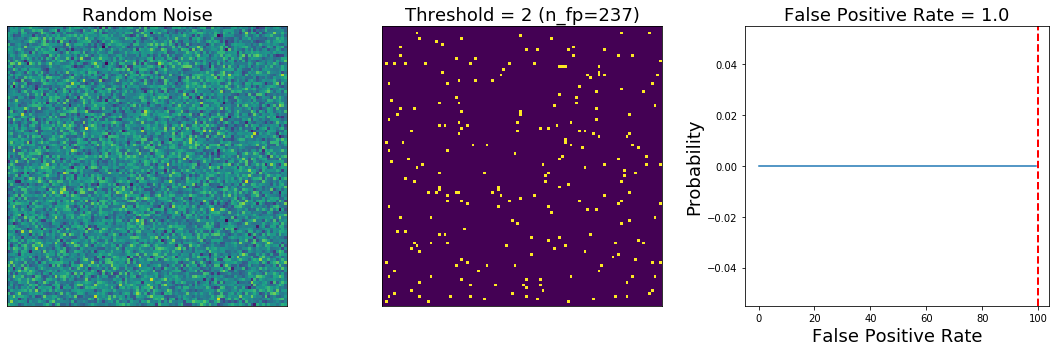

In [195]:
def simulate_noise(grid_width=100):
    return np.random.randn(grid_width, grid_width)

def threshold_simulation(simulation, threshold):
    return simulation>threshold

def false_positives(thresholded_simulation):
    return np.sum(thresholded_simulation)

def simulate_false_positives(n_simulations, threshold, grid_width):
    return np.array([false_positives(threshold_simulation(simulate_noise(grid_width), threshold)) for x in range(n_simulations)])

def false_positive_rate(false_positives, threshold):
    return np.mean(simulate_false_positives(n_simulations, threshold) > 1)

def plot_grid_simulation(grid_width, threshold, n_simulations):
    simulation = simulate_noise(grid_width=grid_width)
    thresholded_simulation = threshold_simulation(simulation, threshold)
    fp = false_positives(thresholded_simulation)
    sim_fp = simulate_false_positives(n_simulations, threshold, grid_width) > 1

    f,a = plt.subplots(ncols=3, figsize=(15, 5))
    a[0].imshow(simulation)
    a[0].set_title('Random Noise', fontsize=18)
    a[0].axes.get_xaxis().set_visible(False)
    a[0].axes.get_yaxis().set_visible(False)
    a[1].imshow(thresholded_simulation)
    a[1].set_title(f'Threshold = {threshold} (n_fp={fp})', fontsize=18)
    a[1].axes.get_xaxis().set_visible(False)
    a[1].axes.get_yaxis().set_visible(False)
    a[2].plot(binom.pmf(np.arange(0, n_simulations, 1), n_simulations, np.mean(sim_fp)))
    a[2].axvline(x=np.mean(sim_fp)*n_simulations, color='r', linestyle='dashed', linewidth=2)
    a[2].set_title(f'False Positive Rate = {np.mean(sim_fp)}', fontsize=18)
    a[2].set_ylabel('Probability', fontsize=18)
    a[2].set_xlabel('False Positive Rate', fontsize=18)
    plt.tight_layout()

threshold = 2
n_simulations = 100
grid_width = 100
plot_grid_simulation(grid_width, threshold, n_simulations)

So this particular threshold (i.e., 2) results in observing at least one false positive across every one of our simulations.  

What if we looked at a fewer number of voxels? How would this change our false positive rate?

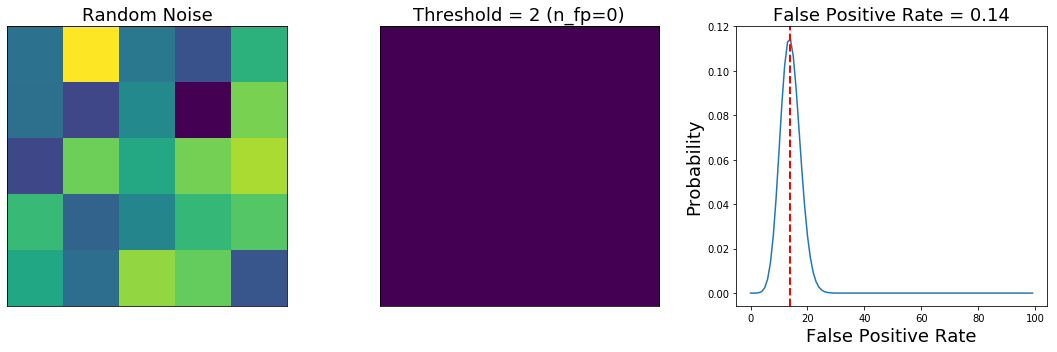

In [204]:
threshold = 2
n_simulations = 100
grid_width = 5
plot_grid_simulation(grid_width, threshold, n_simulations)

This simulation shows that examining fewer numbers of voxels will yield considerably less false positives.

What about if we increase the threshold on our original 100 x 100 grid?

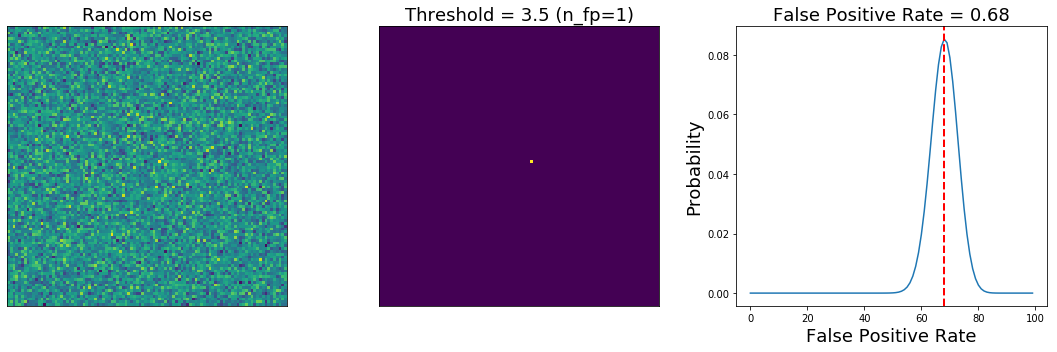

In [210]:
threshold = 3.5
n_simulations = 100
grid_width = 100
plot_grid_simulation(grid_width, threshold, n_simulations)

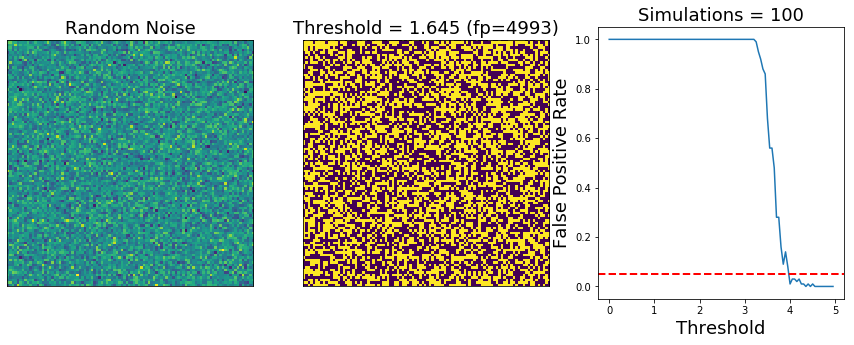

In [149]:
n_voxels = len(simulate_noise())**2
alpha = 0.05
bonf_threshold = alpha/n_voxels
sim = simulate_noise()
sim_thresholded = threshold_simulation(sim, bonf_threshold)
fp = false_positives(sim_thresholded)
sim_fp = simulate_false_positives(n_simulations, bonf_threshold)

fpr = false_positive_rate(sim_fp, threshold)

x = np.arange(0,5, .05)
estimate_thresh = [false_positive_rate(n_simulations, u) for u in x]

f,a = plt.subplots(ncols=3, figsize=(15, 5))
a[0].imshow(sim)
a[0].set_title('Random Noise', fontsize=18)
a[0].axes.get_xaxis().set_visible(False)
a[0].axes.get_yaxis().set_visible(False)
a[1].imshow(sim_thresholded)
a[1].set_title(f'Threshold = {threshold} (fp={fp})', fontsize=18)
a[1].axes.get_xaxis().set_visible(False)
a[1].axes.get_yaxis().set_visible(False)
a[2].plot(x, estimate_thresh)
a[2].set_ylabel('False Positive Rate', fontsize=18)
a[2].set_xlabel('Threshold', fontsize=18)
a[2].set_title(f'Simulations = {n_simulations}', fontsize=18)
a[2].axhline(y=alpha, color='r', linestyle='dashed', linewidth=2)

# a[2].hist(sim_fp)
# a[2].axvline(x=np.mean(sim_fp), color='r', linestyle='dashed', linewidth=2)
# a[2].set_title(f'False Positive Rate = {fpr}', fontsize=18)


In [ ]:
def simulate_noise(grid_width=100):
    return np.random.randn(grid_width, grid_width)

def threshold_simulation(simulation, threshold):
    return simulation>threshold

def false_positives(thresholded_simulation):
    return np.sum(thresholded_simulation)

def simulate_false_positives(n_simulations, threshold, grid_width):
    return np.array([false_positives(threshold_simulation(simulate_noise(grid_width), threshold)) for x in range(n_simulations)])

def false_positive_rate(false_positives, threshold, grid_width):
    return np.mean(simulate_false_positives(n_simulations, threshold, grid_width) > 1)

def plot_grid_simulation(grid_width, threshold, n_simulations):
    simulation = simulate_noise(grid_width=grid_width)
    thresholded_simulation = threshold_simulation(simulation, threshold)
    fp = false_positives(thresholded_simulation)
    sim_fp = simulate_false_positives(n_simulations, threshold, grid_width) > 1

    f,a = plt.subplots(ncols=3, figsize=(15, 5))
    a[0].imshow(simulation)
    a[0].set_title('Random Noise', fontsize=18)
    a[0].axes.get_xaxis().set_visible(False)
    a[0].axes.get_yaxis().set_visible(False)
    a[1].imshow(thresholded_simulation)
    a[1].set_title(f'Threshold = {threshold} (n_fp={fp})', fontsize=18)
    a[1].axes.get_xaxis().set_visible(False)
    a[1].axes.get_yaxis().set_visible(False)
    a[2].plot(binom.pmf(np.arange(0, n_simulations, 1), n_simulations, np.mean(sim_fp)))
    a[2].axvline(x=np.mean(sim_fp)*n_simulations, color='r', linestyle='dashed', linewidth=2)
    a[2].set_title(f'False Positive Rate = {np.mean(sim_fp)}', fontsize=18)
    a[2].set_ylabel('Probability', fontsize=18)
    a[2].set_xlabel('False Positive Rate', fontsize=18)
    plt.tight_layout()

threshold = 2
n_simulations = 100
grid_width = 100
plot_grid_simulation(grid_width, threshold, n_simulations)

(100, 100)


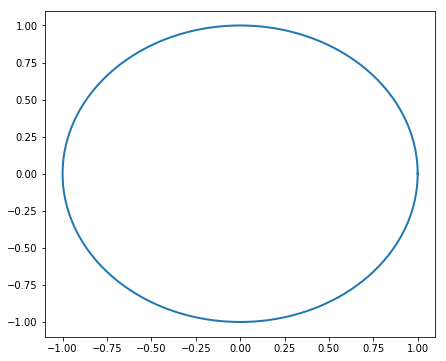

In [64]:


# make a simple unit circle 
theta = np.linspace(0, 2*np.pi, num_samples)
a, b = 1 * np.cos(theta), 1 * np.sin(theta)

# generate the points
# theta = np.random.rand((num_samples)) * (2 * np.pi)
r = np.random.rand((num_samples))
x, y = r * np.cos(theta), r * np.sin(theta)

# plots
plt.figure(figsize=(7,6))
plt.plot(a, b, linestyle='-', linewidth=2, label='Circle')
# plt.plot(x, y, marker='o', linestyle='.', label='Samples')



# FDR

0.005627356757609594


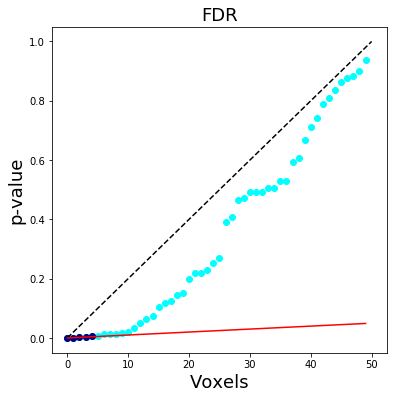

In [239]:
from nltools.stats import fdr

q = 0.05
n_voxels = 50
sig_voxels = 10
p = np.random.random(n_voxels-sig_voxels)*.95
p = np.concatenate([p, (np.random.random(sig_voxels)/sig_voxels)*.2])
p = np.sort(p)
thresh = fdr(p)
print(thresh)
plt.figure(figsize=(6,6))
plt.plot(p, 'o', color='cyan')
plt.plot(p[p<thresh], 'o', color='navy')
plt.plot([0, n_voxels],[0, 1],'k--')
plt.plot(np.arange(0, n_voxels, 1), [(x/n_voxels)*q for x in range(n_voxels)], 'r')
plt.ylabel('p-value', fontsize=18)
plt.xlabel('Voxels', fontsize=18)
plt.title('FDR', fontsize=18)
plt.savefig('/Users/lukechang/Dropbox/Dartmouth/Teaching/Psych60_HumanBrainImaging/Figures/fdr_calc.pdf')
plt.savefig('/Users/lukechang/Dropbox/Dartmouth/Teaching/Psych60_HumanBrainImaging/Figures/fdr_calc.png')

# TFCE

threshold is ignored for simple axial plots
134
threshold is ignored for simple axial plots
380


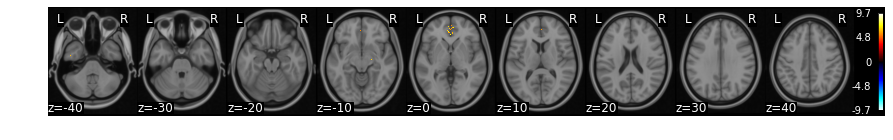

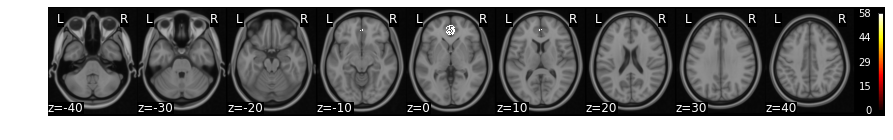

In [249]:
import numpy as np
from nltools.mask import create_sphere
from nltools.data import Brain_Data
from nltools.stats import fdr
import matplotlib.pyplot as plt
from nilearn.plotting import plot_glass_brain, plot_stat_map
import scipy, scipy.stats
from scipy.ndimage import label, generate_binary_structure
import nibabel as nib

def simulate_data(n_samples, amplitude, sigma, coordinates, radius):
    ''' Simulate Brain Data

        Args:
            n_observations: (int) number of data points
            amplitude: (array) signal amplitude
            sigma: (float) amount of gaussian noise to add
            coordinates: (list) x,y,z coordinates of sphere center
            radius: (int) radius of sphere

        Returns:
            data: (list) of Brain_Data objects
    '''

    mask = create_sphere(coordinates, radius=radius)
    dat = Brain_Data(mask)
    dat = dat*amplitude
    dat = Brain_Data([dat for x in range(n_samples)])
    dat.data = dat.data + np.random.randn(*dat.data.shape)*sigma
    return dat

coordinates = [0, 45, 0]
radius = 10
sigma = 1
amplitude = 1
n_samples = 20
dat = simulate_data(n_samples, amplitude, sigma, coordinates, radius)

stats = dat.ttest(threshold_dict={'fdr':0.05})
t = stats['t'].copy()

def clusterize_image(image, threshold=None, connectivity=3):
    
    if threshold is None:
        threshold = 0
    image[np.where(image <= threshold)] = 0
    s = generate_binary_structure(3, connectivity)
    labels, n_features = label(image, s)
    return labels

def tfce(data, connectivity=3, h=2, e=0.5, dh=0.1, cluster_extent=3):
    '''This function performs threshold free cluster enhancement as
    described in Smith & Nichols (2009)
    
    Args:
        h: (float) height exponent (default=2.0)
        h: (float) extent exponent (default=0.5)
        connectivity: (int) connectivity.  6 = surface, 18 = edge, 26 = corner. (default=26)
        dh: (float) step size to discretize cluster formation. (default=0.1)
        cluster_extent: only include clusters of size greater than cluster_extent
        
    Returns:
        dat: (Brain_Data) Transformed Brain_Data instance
    '''
    if not isinstance(data, nib.Nifti1Image):
        raise ValueError('Data must be a nibabel instance')
        
    labels = clusterize_image(data.get_data(), threshold=4, connectivity=connectivity)
    label_id, label_count = np.unique(labels, return_counts=True)
    label_id, label_count = (label_id[1:], label_count[1:]) # Drop label=0 as it is everything that doesn't exceed threshold.

    # Drop any clusters that are below cluster_extent
    label_id = label_id[label_count > cluster_extent]
    label_count = label_count[label_count > cluster_extent]
    
    # Calculate cluster extent
    cluster_size = np.zeros(labels.shape)
    for i,x in zip(label_id, label_count):
        cluster_size[labels==i] = x

    # Calculate TFCE
    tfce_values = np.zeros(cluster_size.shape)
    for thresh in thresholds:
        tfce_values += cluster_size**e*np.power(thresh, h)
    tfce_values = tfce_values*dh
    return nib.Nifti1Image(tfce_values, data.affine)

f = stats['thr_t'].plot()
print(np.sum(stats['thr_t'].data !=0))

t_tfce = Brain_Data(tfce(stats['t'].to_nifti()))
f = t_tfce.plot()
print(np.sum(t_tfce.data !=0))

In [244]:
print(np.sum(t_tfce.data !=0))

113
368


# Cluster Correction

In [ ]:
# Family Wise Error Rate
u = threshold

# Volume of Search Region
V = n_voxels

# Calculate the smoothness of the image in each dimension - wavelet?
fwhm_x = smoothness_x
fwhm_y = smoothness_y
fwhm_z = smoothness_z

# Resolution Element (resel)
R = v/(fwhm_x*fwhm_y*fwhm_z)

# Expected Euler characteristic
expected_ec = R * np.power(4*np.log,(3/2)) * (np.power(u,2)-1) * np.exp((-1/2)*np.power(u,2))*np.power(2*np.pi, -2)

In [36]:
h=2; e=0.5; dh=1;
thresholds = np.arange(0, dat.data.max(), dh)
thresholds

array([0., 1., 2., 3., 4.])

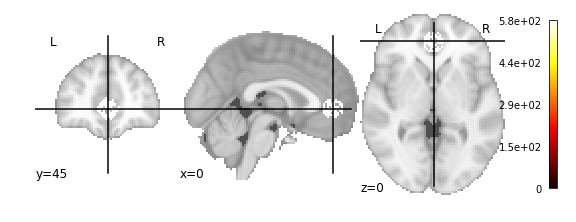

In [106]:
t_nifti = t.to_nifti()
labels = clusterize_image(t_nifti.get_data(), threshold=4, connectivity=3)
label_id, label_count = np.unique(labels, return_counts=True)
label_id, label_count = (label_id[1:], label_count[1:]) # Drop label=0 as it is everything that doesn't exceed threshold.

# Drop any clusters that are only 1 voxel
label_id = label_id[label_count!=1]
label_count = label_count[label_count!=1]
cluster_size = np.zeros(labels.shape)
for i,x in zip(label_id, label_count):
    cluster_size[labels==i] = x

tfce_values = np.zeros(cluster_size.shape)
for thresh in thresholds:
    tfce_values += cluster_size**e*np.power(thresh, h)
tfce_values = tfce_values*dh
return nib.Nifti1Image(tfce_values, t_nifti.affine)

# print(label_id, label_count)
# plot_stat_map(labels)
tfce_nifti = nib.Nifti1Image(tfce_values, t_nifti.affine)
plot_stat_map(tfce_nifti)


In [92]:
h=2; e=0.5; dh=1;
thresholds = np.arange(0, dat.data.max(), dh)

tfce_values = np.zeros(labels.shape)
# for thresh in thresholds:
thresh = thresholds[-1]
labels = clusterize_image(t_nifti.get_data(), threshold=thresh, connectivity=3)
label_id, label_count = np.unique(labels, return_counts=True)

clust_size = np.zeros((len(labels.flatten()), len(label_id)))
for i, x in zip(label_id, label_count):
    clust_size[(labels==i).flatten(), i] = x
# tfce_values = (clust_size**e)*(thresh^h)

TypeError: ufunc 'bitwise_xor' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [70]:
# np.argwhere()
clust_size = np.zeros(labels.shape)
# for i,x in enumerate(label_id):
#     print(x, label_count[i])
#     clust_size[np.argwhere(labels == np.argwhere(x))] = label_count[i]

# plot_stat_map(nib.Nifti1Image(new_labels, t_nifti.affine))

In [ ]:
function [tfced] = matlab_tfce_transform(img,H,E,C,dh)
%MATLAB_TFCE_TRANSFORM performs threshold free cluster enhancement
%   [tfced] = matlab_tfce_transform(img,H,E,C,ndh) performs threshold
%   free cluster enhancement on 'img' as per Smith & Nichols (2009).
%   -- img the 3D image to be transformed
%   -- H height exponent
%   -- E extent exponent
%   -- C connectivity
%   -- dh size of steps for cluster formation

% set cluster thresholds
threshs = 0:dh:max(img(:));
threshs = threshs(2:end);
ndh = length(threshs);

% find positive voxels (greater than first threshold)
nvox = length(img(:));

% find connected components
vals = zeros(nvox,1);
cc = arrayfun(@(x) bwconncomp(bsxfun(@ge,img,x),C), threshs);
for h = 1:ndh
    clustsize = zeros(nvox,1);
    ccc = cc(h);
    voxpercc = cellfun(@numel,ccc.PixelIdxList);
    for c = 1:ccc.NumObjects
        clustsize(ccc.PixelIdxList{c}) = voxpercc(c);
    end
    % calculate transform
    curvals = (clustsize.^E).*(threshs(h)^H);
    vals = vals + curvals;
end
tfced = NaN(size(img));
tfced(:) = vals.*dh;

end


In [ ]:
def simulate_noise(grid_width=100, n_subjects=20):
    noise = np.random.randn(grid_width, grid_width, n_subjects)
    flatten = noise.reshape(grid_width*grid_width, n_subjects)
    t, p = ttest_1samp(flatten.T, 0)
    return (np.reshape(t, (grid_width, grid_width)), np.reshape(p, (grid_width, grid_width)))   

def threshold_simulation(simulation, threshold, threshold_type='t'):
    simulation = deepcopy(simulation)
    t, p = simulation
    t[p < threshold] = 1
    t[p >= threshold] = 0
    return t

def false_positives(thresholded_simulation):
    return np.sum(thresholded_simulation)

def simulate_false_positives(n_simulations, threshold, grid_width, n_subjects):
    return np.array([false_positives(threshold_simulation(simulate_noise(grid_width, n_subjects), threshold)) for x in range(n_simulations)])

def false_positive_rate(false_positives, threshold, grid_width, n_subjects):
    return np.mean(simulate_false_positives(n_simulations, threshold, grid_width, n_subjects) > 1)

def plot_grid_simulation(grid_width, n_subjects, threshold, n_simulations):
    simulation = simulate_noise(grid_width=grid_width, n_subjects=n_subjects)
    thresholded_simulation = threshold_simulation(simulation, threshold)
    fp = false_positives(thresholded_simulation)
    sim_fp = simulate_false_positives(n_simulations, threshold, grid_width, n_subjects) > 1

    f,a = plt.subplots(ncols=3, figsize=(15, 5))
    a[0].imshow(simulation[0])
    a[0].set_title('Random Noise', fontsize=18)
    a[0].axes.get_xaxis().set_visible(False)
    a[0].axes.get_yaxis().set_visible(False)
    a[1].imshow(thresholded_simulation)
    a[1].set_title(f'Threshold = {threshold} (n_fp={fp})', fontsize=18)
    a[1].axes.get_xaxis().set_visible(False)
    a[1].axes.get_yaxis().set_visible(False)
    a[2].plot(binom.pmf(np.arange(0, n_simulations, 1), n_simulations, np.mean(sim_fp)))
    a[2].axvline(x=np.mean(sim_fp)*n_simulations, color='r', linestyle='dashed', linewidth=2)
    a[2].set_title(f'False Positive Rate = {np.mean(sim_fp)}', fontsize=18)
    a[2].set_ylabel('Probability', fontsize=18)
    a[2].set_xlabel('False Positive Rate', fontsize=18)
    plt.tight_layout()

def create_mask(grid_width, signal_width):
    mask = np.zeros((grid_width, grid_width))
    mask[int((np.floor((grid_width/2)-(signal_width/2)))):int(np.ceil((grid_width/2)+(signal_width/2))), int((np.floor((grid_width/2)-(signal_width/2)))):int(np.ceil((grid_width/2)+(signal_width/2)))] = 1
    return mask

def simulate_noise_with_signal(grid_width, n_subjects, signal_width, signal_amplitude):
    if signal_width >= grid_width:
        raise ValueError('Signal width must be smaller than total grid.')
    noise = np.random.randn(grid_width, grid_width, n_subjects)
    signal = create_mask(grid_width, signal_width) * signal_amplitude
    data = np.array([signal + noise[:,:,i] for i in range(n_subjects)])
    data = np.swapaxes(data, 0, 2)
    flatten = data.reshape(grid_width*grid_width, n_subjects)
    t,p = ttest_1samp(flatten.T, 0)
    return (np.reshape(t, (grid_width, grid_width)), np.reshape(p, (grid_width, grid_width)))

def true_positives(thresholded_simulation, mask):
    return np.sum(thresholded_simulation[mask==1])

def simulate_signal_recovery(n_simulations, threshold, grid_width, n_subjects, signal_width, signal_amplitude):
    mask = create_mask(grid_width, signal_width)
    fpr = []; tpr = [];
    for x in range(n_simulations):
        simulated, p = simulate_noise_with_signal(grid_width, n_subjects, signal_width, signal_amplitude)
        thresholded_simulation = threshold_simulation(simulated, threshold)
        fpr.append(np.sum(thresholded_simulation[mask!=1]))
        tpr.append(true_positives(thresholded_simulation, mask))
    return (np.array(tpr)/np.sum(mask), np.array(fpr)>1)

def plot_grid_simulation_with_signal(grid_width, n_subjects, signal_width, signal_amplitude, threshold, n_simulations, use_fdr=False):
    simulation, p = simulate_noise_with_signal(grid_width, n_subjects, signal_width, signal_amplitude)
    if use_fdr:
        threshold = fdr(p.flatten())
        print(f"Using FDR Correction: {threshold}")
        
    thresholded_simulation = threshold_simulation(simulation, threshold)
    mask = create_mask(grid_width, signal_width)
    tp = true_positives(thresholded_simulation, mask)
    fp = false_positives(thresholded_simulation)
    sim_fp = simulate_false_positives(n_simulations, threshold, grid_width, n_subjects) > 1
    tpr, fpr = simulate_signal_recovery(n_simulations, threshold, grid_width, n_subjects, signal_width, signal_amplitude)

    f,a = plt.subplots(ncols=4, figsize=(18, 5))
    a[0].imshow(simulation)
    a[0].set_title('Random Noise', fontsize=18)
    a[0].axes.get_xaxis().set_visible(False)
    a[0].axes.get_yaxis().set_visible(False)
    a[1].imshow(thresholded_simulation)
    a[1].set_title(f'Threshold = {threshold}', fontsize=18)
    a[1].axes.get_xaxis().set_visible(False)
    a[1].axes.get_yaxis().set_visible(False)
    a[2].plot(binom.pmf(np.arange(0, n_simulations, 1), n_simulations, np.mean(fpr)))
    a[2].axvline(x=np.mean(sim_fp)*n_simulations, color='r', linestyle='dashed', linewidth=2)
    a[2].set_title(f'False Positive Rate = {np.mean(sim_fp)}', fontsize=18)
    a[2].set_ylabel('Probability', fontsize=18)
    a[2].set_xlabel('False Positive Rate', fontsize=18)
    a[3].hist(tpr)
    a[3].set_ylabel('Frequency', fontsize=18)
    a[3].set_xlabel('Percent Signal Recovery', fontsize=18)
    a[3].set_title(f'Average Signal Recovery', fontsize=18)
    plt.tight_layout()

threshold = .05
n_simulations = 100
grid_width = 100
n_subjects = 20
plot_grid_simulation(grid_width, n_subjects, threshold, n_simulations)